In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,6)})

In [563]:
sales = pd.read_csv('Sales_April_2019.csv')

Show data & EDA

In [564]:
#printing first 10 columns
sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [565]:
#printing last 10 columns
sales.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18373,194085,Wired Headphones,1,11.99,04/17/19 20:12,"315 12th St, Los Angeles, CA 90001"
18374,194086,Google Phone,1,600,04/28/19 08:50,"981 Dogwood St, Los Angeles, CA 90001"
18375,194087,USB-C Charging Cable,2,11.95,04/26/19 11:44,"35 13th St, Portland, OR 97035"
18376,194088,AAA Batteries (4-pack),2,2.99,04/04/19 18:46,"718 12th St, Austin, TX 73301"
18377,194089,USB-C Charging Cable,1,11.95,04/09/19 17:15,"458 11th St, San Francisco, CA 94016"
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


In [566]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [567]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


In [568]:
#number of rows and columns before cleaning 
row,col=sales.shape
print("number of rows are ",row)
print("number of columns ara ",col)

number of rows are  18383
number of columns ara  6


In [569]:
#check if ther is null vlaue 
sales.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [570]:
#explor row that have nan value
sales_nan = sales[sales.isna().any(axis=1)]

In [571]:
#number of raws thats have nan values are 59 , i will deleted it 
sales_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 17718
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
dtypes: object(6)
memory usage: 3.2+ KB


In [572]:
#delete nan

sales_without_nan = sales.dropna(how='all')

In [573]:
sales_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18324 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 1002.1+ KB


In [574]:
sales_df = pd.DataFrame(sales_without_nan)

In [575]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [576]:
sales_duplicate = sales_df[sales_df.duplicated()]

In [577]:
sales_duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [578]:
# delete duplicated raws that have mistake value 
sales_df=sales_df.drop_duplicates()

In [579]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18268 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18268 non-null  object
 1   Product           18268 non-null  object
 2   Quantity Ordered  18268 non-null  object
 3   Price Each        18268 non-null  object
 4   Order Date        18268 non-null  object
 5   Purchase Address  18268 non-null  object
dtypes: object(6)
memory usage: 999.0+ KB


In [580]:
# check the data is correct in price each  
check_data = sales_df[sales_df['Price Each'] == 'Price Each']
check_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [581]:
# delete raw index number is 519 
sales_df = sales_df.drop(labels=519, axis=0)

In [582]:
# convert data type from object to float , str , number
sales_df['Price Each'] = sales_df['Price Each'].map(lambda x: float(x))

In [583]:
sales_df['Order ID'] = sales_df['Order ID'].map(lambda x: int(x))

In [584]:
sales_df['Quantity Ordered'] = sales_df['Quantity Ordered'].map(lambda x: int(x))

In [585]:
sales_df['Product'] = sales_df['Product'].map(lambda x: str(x))

In [586]:
#explore the data type 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18267 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18267 non-null  int64  
 1   Product           18267 non-null  object 
 2   Quantity Ordered  18267 non-null  int64  
 3   Price Each        18267 non-null  float64
 4   Order Date        18267 non-null  object 
 5   Purchase Address  18267 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 999.0+ KB


In [587]:
# add new column to calculate the sum of sale in each raw
sales_df['Total Sale'] = sales_df['Quantity Ordered'] *  sales_df['Price Each']

In [588]:
# to answer on this question : what city the highest number of sales ? must retrive the 
#city name from Purchase Address raw . i will add new column "city"


def city(city_name):
    return city_name.split(',')[1]

In [589]:
sales_df['City'] = sales_df['Purchase Address'].map(lambda x: city(x))

In [590]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [591]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18267 entries, 0 to 18382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18267 non-null  int64  
 1   Product           18267 non-null  object 
 2   Quantity Ordered  18267 non-null  int64  
 3   Price Each        18267 non-null  float64
 4   Order Date        18267 non-null  object 
 5   Purchase Address  18267 non-null  object 
 6   Total Sale        18267 non-null  float64
 7   City              18267 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [592]:
#Q1-what city the highest number of sales ? and show column total sale only , the result is same

heighst_city = sales_df.groupby('City')['Total Sale'].sum()

In [593]:
heighst_city

City
 Atlanta          284428.02
 Austin           172683.59
 Boston           353465.22
 Dallas           252715.53
 Los Angeles      551215.34
 New York City    446454.91
 Portland         241128.11
 San Francisco    817035.88
 Seattle          275480.25
Name: Total Sale, dtype: float64

<AxesSubplot:title={'center':'city the highest number of sales'}, xlabel='City', ylabel='Total Sale'>

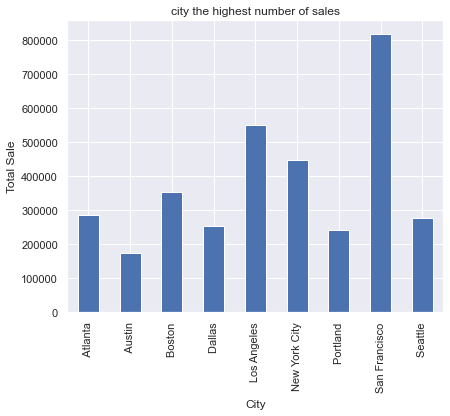

In [594]:
heighst_city.plot(kind='bar', title='city the highest number of sales', ylabel='Total Sale',
         xlabel='City', figsize=(6, 5))

In [595]:
#Q2 : what time should we display advertisements to maximize likelihood of customer buying product ?
#first : i will convert column Order date to  datetimelike 
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')

In [596]:
# second : i will add new column to hour to calculate the maximize likeihood buying product from customer

sales_df['hour'] = sales_df['Order Date'].dt.hour

In [597]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,9


In [598]:
# third : by group by on hour i will calclate count 
max_buy_product = sales_df.groupby('hour')['Product'].count()

In [599]:
max_buy_product

hour
0      377
1      243
2      132
3       85
4       84
5      143
6      254
7      384
8      642
9      869
10    1133
11    1200
12    1199
13    1191
14    1112
15     986
16    1054
17    1011
18    1225
19    1283
20    1201
21    1013
22     847
23     599
Name: Product, dtype: int64

<AxesSubplot:title={'center':'maximize likelihood of customer buying product'}, xlabel='hour', ylabel='NO.Ordered'>

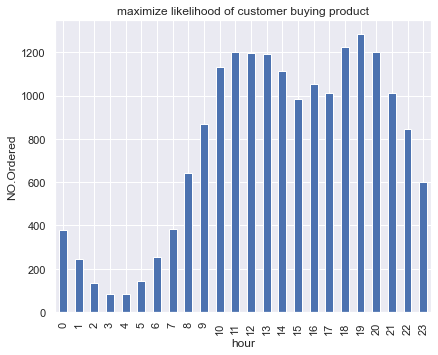

In [600]:
max_buy_product.plot(kind='bar', title='maximize likelihood of customer buying product', ylabel='NO.Ordered',
         xlabel='hour', figsize=(6, 5))

In [601]:
#Q3: what product sold the most ?

sold_most = sales_df.groupby('Product')['Quantity Ordered'].sum()

In [602]:
sold_most

Product
20in Monitor                   394
27in 4K Gaming Monitor         565
27in FHD Monitor               737
34in Ultrawide Monitor         652
AA Batteries (4-pack)         2821
AAA Batteries (4-pack)        2933
Apple Airpods Headphones      1523
Bose SoundSport Headphones    1286
Flatscreen TV                  458
Google Phone                   581
LG Dryer                        77
LG Washing Machine              61
Lightning Charging Cable      2365
Macbook Pro Laptop             455
ThinkPad Laptop                392
USB-C Charging Cable          2266
Vareebadd Phone                220
Wired Headphones              2065
iPhone                         695
Name: Quantity Ordered, dtype: int64

<AxesSubplot:title={'center':'product sold the most'}, xlabel='Product', ylabel='Quantity Ordered'>

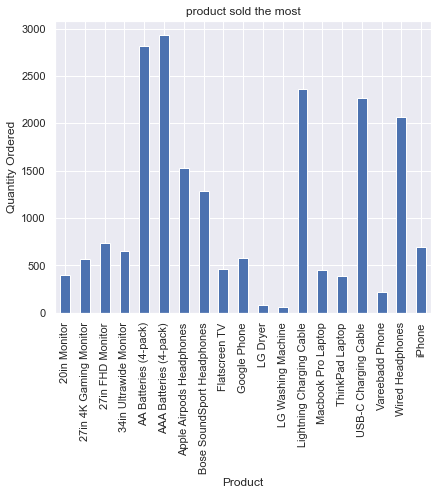

In [603]:
sold_most.plot(kind='bar', title='product sold the most', ylabel='Quantity Ordered',
         xlabel='Product', figsize=(6, 5))

In [604]:
sales_df.shape

(18267, 9)

In [605]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18267 entries, 0 to 18382
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18267 non-null  int64         
 1   Product           18267 non-null  object        
 2   Quantity Ordered  18267 non-null  int64         
 3   Price Each        18267 non-null  float64       
 4   Order Date        18267 non-null  datetime64[ns]
 5   Purchase Address  18267 non-null  object        
 6   Total Sale        18267 non-null  float64       
 7   City              18267 non-null  object        
 8   hour              18267 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [606]:
sales_df.describe()

,Order ID,Quantity Ordered,Price Each,Total Sale,hour
count,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000
mean,185330.420595,1.124760,184.573645,185.832750,14.338589
std,5061.670698,0.436651,331.069060,332.381465,5.429847
min,176558.000000,1.000000,2.990000,2.990000,0.000000
25%,180953.500000,1.000000,11.950000,11.950000,11.000000
50%,185332.000000,1.000000,14.950000,14.950000,15.000000
75%,189707.500000,1.000000,150.000000,150.000000,19.000000
max,194094.000000,7.000000,1700.000000,3400.000000,23.000000


/Users/sh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Each', ylabel='Density'>

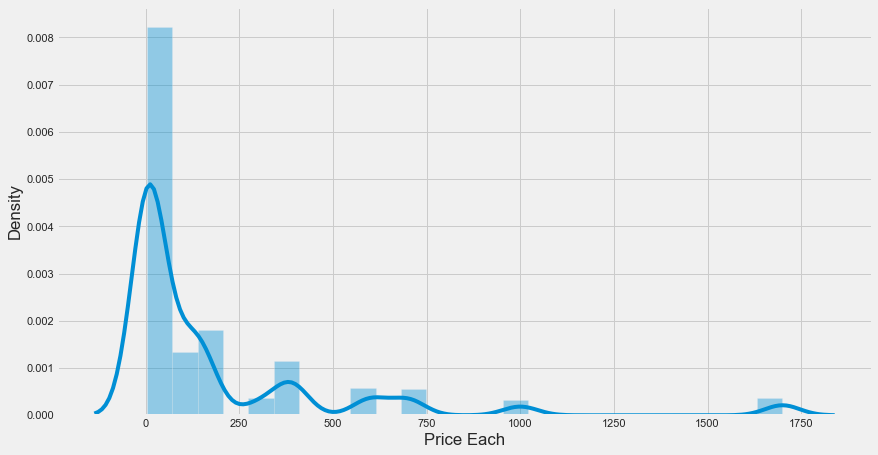

In [607]:
# distplot for Price Each
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(sales_df['Price Each'], bins=25)

/Users/sh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


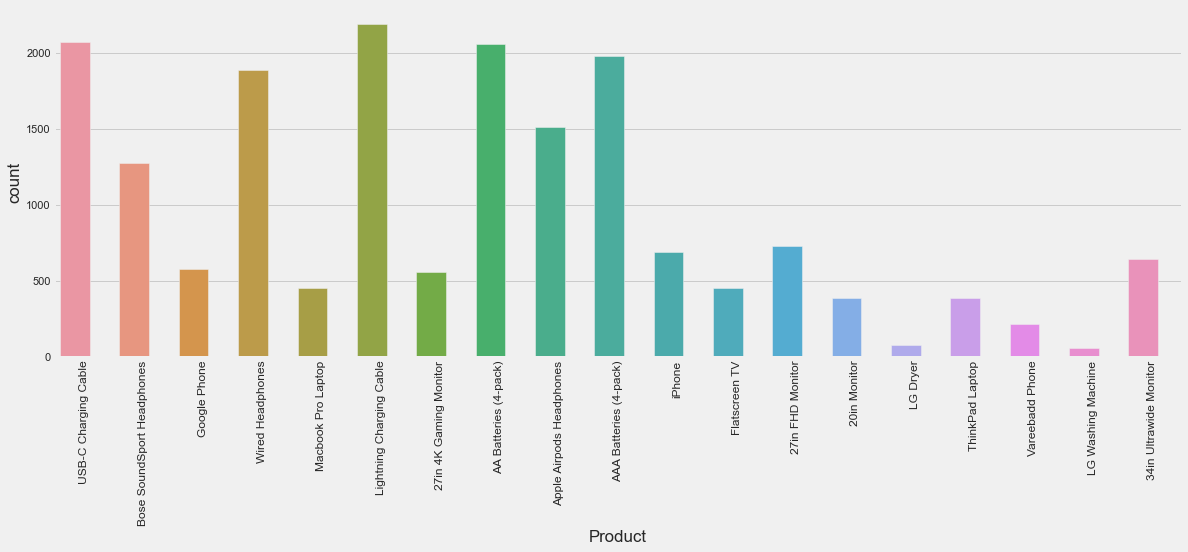

In [608]:
fig, ax = plt.subplots(figsize = (18,6))
plt.style.use('fivethirtyeight')
sns.countplot(sales_df['Product'])
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 12)
plt.setp(ax.patches, width = 0.5)
plt.show()

/Users/sh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

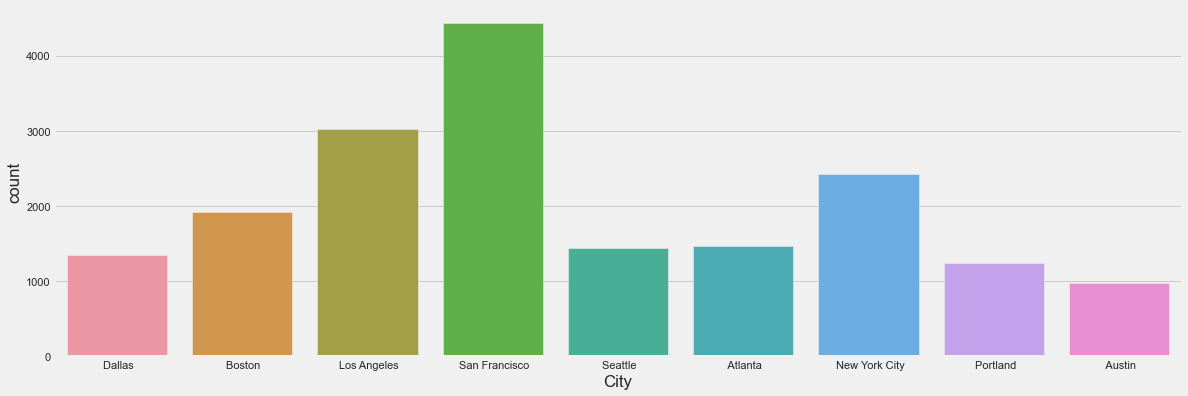

In [609]:
sns.countplot(sales_df['City'])

In [610]:
# check for null values
sales_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Total Sale          0
City                0
hour                0
dtype: int64

In [611]:
# label encoding
cols = ['City','Product']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    sales_df[col] = le.fit_transform(sales_df[col])
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,City,hour
0,176558,15,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,3,8
2,176559,7,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2,22
3,176560,9,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,14
4,176560,17,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,14
5,176561,17,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,9


In [612]:
sales_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,City,hour
0,176558,15,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,3,8
2,176559,7,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2,22
3,176560,9,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,14
4,176560,17,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,14
5,176561,17,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,9
6,176562,15,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,7,13
7,176563,7,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,8,7
8,176564,15,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,0,10
9,176565,13,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,7,10
10,176566,17,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,2,14


In [613]:
sales_ba= sales_df[sales_df['Total Sale']<= 29]

In [614]:
sales_ba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10017 entries, 0 to 18382
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          10017 non-null  int64         
 1   Product           10017 non-null  int64         
 2   Quantity Ordered  10017 non-null  int64         
 3   Price Each        10017 non-null  float64       
 4   Order Date        10017 non-null  datetime64[ns]
 5   Purchase Address  10017 non-null  object        
 6   Total Sale        10017 non-null  float64       
 7   City              10017 non-null  int64         
 8   hour              10017 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 782.6+ KB


In [615]:
sales_ba.drop(columns=['Order ID', 'Quantity Ordered','hour','Quantity Ordered','Order Date','Purchase Address','Price Each'], inplace = True)
sales_ba.head()

/Users/sh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Product,Total Sale,City
0,15,23.90,3
4,17,11.99,4
5,17,11.99,4
6,15,11.95,7
8,15,11.95,0


In [616]:
x = sales_ba[['Product','City']]
y = sales_ba['Total Sale']

In [617]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [618]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [619]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  2.3701188713380255
Coefficient:  [ 0.73841414 -0.02036406]


In [620]:
pred= model.predict(x_test)

In [621]:
print("Prediction for test set: {}".format(pred))

Prediction for test set: [14.76024671  5.32377542  6.02146143 ... 13.30378249  5.20159104
 13.36487469]


In [622]:
diff_actual_prediction = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred})
diff_actual_prediction .head(2000)

,Actual value,Predicted value
12983,11.99,14.760247
9781,3.84,5.323775
11974,2.99,6.021461
6767,11.99,14.780611
4472,3.84,5.160863
...,...,...
9290,11.95,13.283418
9544,3.84,5.283047
2014,15.36,5.221955
7734,11.99,14.841703


In [625]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, pred)
meanSqErr = metrics.mean_squared_error(y_test, pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('R squared: {:.2f}'.format(model.score(x,y)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.58
Mean Absolute Error: 2.7692325290267923
Mean Square Error: 11.32923376910312
Root Mean Square Error: 3.365892715031648
